Text(0.5, 0, 'optical path difference [cm]')

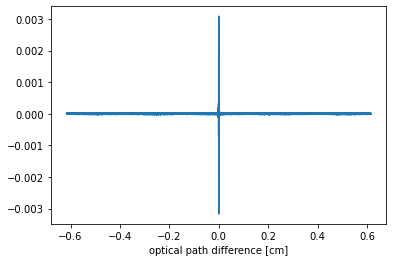

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# for x axis : data points --> optical path difference [cm-1]
col_name = ["data_p","intensity"]
df = pd.read_csv('360mA_50scans.0.dpt', delimiter = '\s+', names=col_name )
shifted_data_p=df["data_p"]-(df["data_p"].size)/2
df_cm=shifted_data_p*632.959*1e-7

# for y axis : make mean value=0
col_name = ["data_p","intensity"]
df_total = pd.DataFrame(np.zeros([len(df),10]))
df_total.columns = [ str(380-20*ii)+'mA' for ii in range (1,11)]

for i in range (0,3):
    j=360-i*20
    name_j=str(j)
    #print(name_j)
    name_k=name_j+"mA_50scans.0.dpt"
    df_y = pd.read_csv(name_k, delimiter = '\s+', names=col_name )
    #df_y = pd.read_csv(name_k, delimiter = ',', names=col_name )
    df2 = df_y["intensity"]-df_y["intensity"].mean()
    df_total.iloc[:,i]=df2

for i in range (3,10):
    j=360-i*20
    name_j=str(j)
    #print(name_j)
    name_k=name_j+"mA_50scans.0.dpt"
    #df_y = pd.read_csv(name_k, delimiter = '\s+', names=col_name )
    df_y = pd.read_csv(name_k, delimiter = ',', names=col_name )
    df2 = df_y["intensity"]-df_y["intensity"].mean()
    df_total.iloc[:,i]=df2

# X axis + Y axis
df_final0 = pd.concat([df_cm, df_total], axis=1)
df_final0.rename(columns = {'data_p':'optical path difference [cm]'}, inplace = True)
plt.plot(df_final0["optical path difference [cm]"], df_final0["360mA"])
plt.xlabel('optical path difference [cm]')

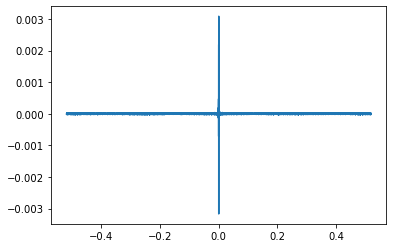

(160, 10)


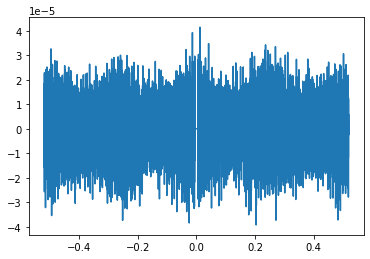

       optical path difference [cm]     360mA     340mA         320mA  \
0                         -0.518520 -0.000016  0.000006 -3.689050e-07   
1                         -0.518457  0.000005 -0.000002 -1.608640e-05   
2                         -0.518393 -0.000012 -0.000013  1.284095e-06   
3                         -0.518330  0.000010 -0.000005 -1.545790e-05   
4                         -0.518267 -0.000009 -0.000012  9.247295e-06   
...                             ...       ...       ...           ...   
16379                      0.518204  0.000006  0.000007  3.932795e-06   
16380                      0.518267  0.000002 -0.000010 -6.998305e-06   
16381                      0.518330  0.000011  0.000005  2.649895e-06   
16382                      0.518393 -0.000003 -0.000011 -5.811205e-06   
16383                      0.518457  0.000012  0.000015 -1.054190e-05   

          300mA         280mA         260mA         240mA     220mA  \
0      0.000012  7.921000e-06 -2.545106e-06 -1.24177

In [2]:
l1=len(df_final0)-2**14
l2=int(l1/2)
df1=df_final0[l2:len(df_final0)-l2]
df1=df1.reset_index(drop=True)

plt.plot(df1["optical path difference [cm]"], df1["360mA"])
plt.show()
l3=80
r1=int(len(df1)/2-l3)
r2=int(len(df1)/2+l3)

df2=df1.iloc[r1:r2,1:]
print(df2.shape)

l4=df2.shape[0]
l5=df2.shape[1]

zero_cent=pd.DataFrame(np.zeros(shape=(l4,l5)))
coh=df1
coh.iloc[r1:r2,1:]=zero_cent
plt.plot(coh["optical path difference [cm]"], coh["360mA"])
plt.show()
print(coh)

In [3]:
# save the result
coh.to_csv('before_FFT.csv', index=None, header=True)

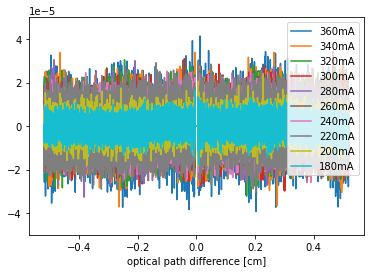

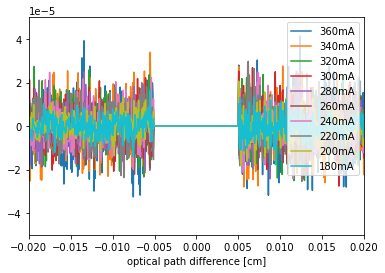

In [4]:
# plot interferogram_2
for k2 in range(1,11):
    kkk2 = str(380-20*k2)+'mA'
    plt.plot(coh["optical path difference [cm]"],coh[kkk2], label = kkk2)
    plt.legend()
    plt.xlabel('optical path difference [cm]')
    plt.ylim(-5e-5,5e-5)

plt.show()
    
for k2 in range(1,11):
    kkk2 = str(380-20*k2)+'mA'
    plt.plot(coh["optical path difference [cm]"],coh[kkk2], label = kkk2)
    plt.legend()
    plt.xlabel('optical path difference [cm]')
    plt.ylim(-5e-5,5e-5)
    plt.xlim(-0.02,0.02)
    
    

In [5]:
#FFT_2
from scipy import fftpack

f_s = 3/632.959*1e17  # Sampling rate, or number of measurements per second

t2 = coh["optical path difference [cm]"]/(3*1e10)

df_after_FFT2 = pd.DataFrame(np.zeros([len(coh["optical path difference [cm]"]),10]))
df_after_FFT2.columns = [ str(380-20*ii2)+'mA' for ii2 in range (1,11)]

for c2 in range(1,11):
    ccc2 = str(380-20*c2)+'mA'
    x2 = coh[ccc2]    
    #plt.plot(t2,x2, label = ccc2)
    #plt.legend()
    #plt.xlabel('Time [s]')
    #plt.ylabel('Signal amplitude')
    
    xx2=x2.to_numpy()
    X2 = fftpack.fft(xx2)
    freqs2 = fftpack.fftfreq(len(xx2)) * f_s
    wn_cm2=1e-2*freqs2/(3*1e8)
    
    #Cannot figure out why 0.3333546 happen
    converted_wn2=wn_cm2*0.3333546
#     plt.plot(converted_wn, np.abs(X),'-o', label=ccc)
#     plt.legend()
#     plt.xlabel('wavenumber [cm-1]')
#     plt.ylabel('Signal amplitude') 
#     plt.xlim(1500,2600)
    
    converted_wn_series2=pd.Series(converted_wn2)
    
    X_series2=pd.Series(np.abs(X2))
    
    df_after_FFT2.iloc[:,c2-1]=X_series2
    
df_after_FFT_wn_domain2 = pd.concat([converted_wn_series2, df_after_FFT2], axis=1)
nn2 = [ str(380-20*ii)+'mA' for ii in range (1,11)]
nn2.insert(0,'wavenumber')

df_after_FFT_wn_domain2.columns=nn2
# print(df_after_FFT_wn_domain2)

ddff2=df_after_FFT_wn_domain2
half_num=len(ddff2['wavenumber'])/2
h_n=int(half_num)
ddff2_2=ddff2.drop(ddff2.index[h_n:(h_n*2)])


In [6]:
# save the result
ddff2_2.to_csv('after_FFT.csv', index=None, header=True)

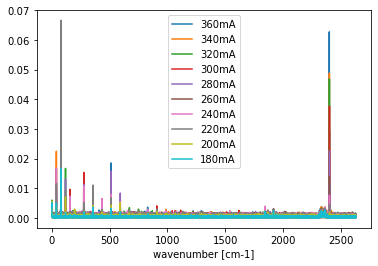

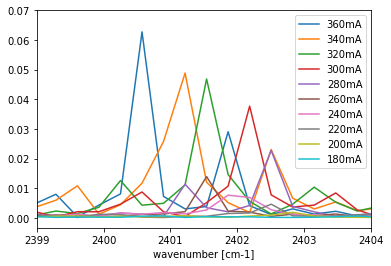

In [7]:
# plot wavenumber domain2
for l2 in range(1,11):
    lll2 = str(380-20*l2)+'mA'
    plt.plot(ddff2_2["wavenumber"],ddff2_2[lll2],'-',label=lll2)
    plt.legend()
    plt.xlabel('wavenumber [cm-1]')
    #plt.xlim(2399,2404)

plt.show()    
for l2 in range(1,11):
    lll2 = str(380-20*l2)+'mA'
    plt.plot(ddff2_2["wavenumber"],ddff2_2[lll2],'-',label=lll2)
    plt.legend()
    plt.xlabel('wavenumber [cm-1]')
    plt.xlim(2399,2404)

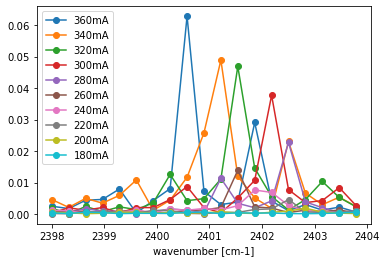

In [8]:
# Slice peak area
cut = ddff2_2.loc[ddff2_2['wavenumber']>=2398]
cutt = cut.loc[cut['wavenumber']<=2404]

# plot after slicing around 2400
for s in range(1,11):
    sss = str(380-20*s)+'mA'
    plt.plot(cutt["wavenumber"],cutt[sss],'-o',label=sss)
    plt.legend()
    plt.xlabel('wavenumber [cm-1]')

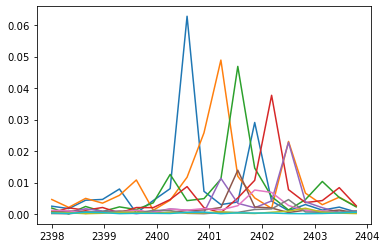

Text(0, 0.5, 'peak area')

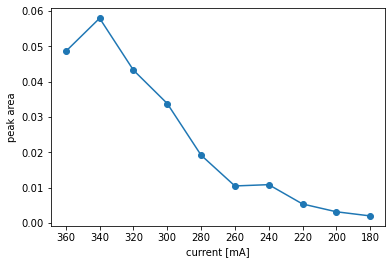

In [9]:
# integrate the area
df_area = pd.DataFrame(np.zeros([10,2]))
df_area.columns = ['mA', 'area']

for s in range(1,11):
    ss = str(380-20*s)
    sss = str(380-20*s)+'mA'
    df_area.iloc[s-1,0]=ss
    
    yy=pd.Series(cutt[sss]).array
    xxx=pd.Series(cutt["wavenumber"]).array
    output = np.trapz(yy,xxx)
    plt.plot(xxx,yy)
    df_area.iloc[s-1,1]=output

plt.show()
plt.plot(df_area["mA"],df_area["area"],'-o')
plt.xlabel('current [mA]')
plt.ylabel('peak area')

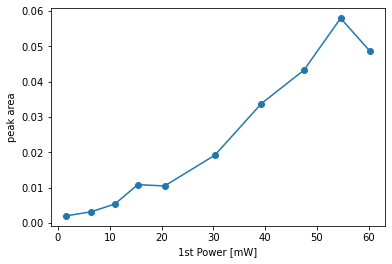

In [10]:
# 1st vs 2nd power

col_name_1st = ["current","1st_power"]
df_1st = pd.read_csv("I_vs_P_1st.txt", delimiter = '\s+', names=col_name_1st)

df_1st_2nd = pd.concat([df_1st, df_area["area"]], axis=1)
df_1st_2nd
plt.plot(df_1st_2nd["1st_power"],df_1st_2nd["area"],'-o')
plt.xlabel('1st Power [mW]')
plt.ylabel('peak area')

df_1st_2nd.to_csv('1st_vs_2nd.csv', index=None, header=True)

# FFT without replacing center part

Text(0.5, 0, 'optical path difference [cm]')

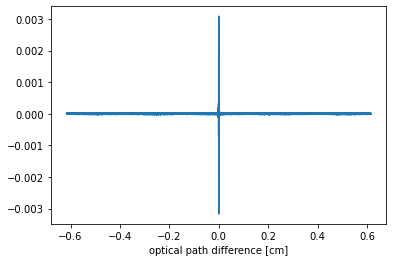

In [12]:
# for x axis : data points --> optical path difference [cm-1]
col_name = ["data_p","intensity"]
df = pd.read_csv('360mA_50scans.0.dpt', delimiter = '\s+', names=col_name )
shifted_data_p=df["data_p"]-(df["data_p"].size)/2
df_cm=shifted_data_p*632.959*1e-7

# for y axis : make mean value=0
col_name = ["data_p","intensity"]
df_total = pd.DataFrame(np.zeros([len(df),10]))
df_total.columns = [ str(380-20*ii)+'mA' for ii in range (1,11)]

for i in range (0,3):
    j=360-i*20
    name_j=str(j)
    #print(name_j)
    name_k=name_j+"mA_50scans.0.dpt"
    df_y = pd.read_csv(name_k, delimiter = '\s+', names=col_name )
    #df_y = pd.read_csv(name_k, delimiter = ',', names=col_name )
    df2 = df_y["intensity"]-df_y["intensity"].mean()
    df_total.iloc[:,i]=df2

for i in range (3,10):
    j=360-i*20
    name_j=str(j)
    #print(name_j)
    name_k=name_j+"mA_50scans.0.dpt"
    #df_y = pd.read_csv(name_k, delimiter = '\s+', names=col_name )
    df_y = pd.read_csv(name_k, delimiter = ',', names=col_name )
    df2 = df_y["intensity"]-df_y["intensity"].mean()
    df_total.iloc[:,i]=df2

# X axis + Y axis
df_final = pd.concat([df_cm, df_total], axis=1)
df_final.rename(columns = {'data_p':'optical path difference [cm]'}, inplace = True)
plt.plot(df_final["optical path difference [cm]"], df_final["360mA"])
plt.xlabel('optical path difference [cm]')

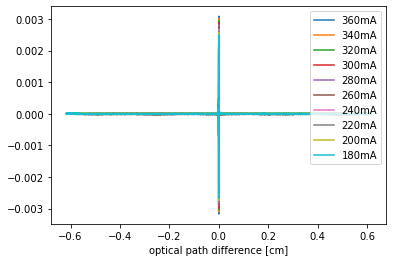

In [13]:
# plot interferogram
for k in range(1,11):
    kkk = str(380-20*k)+'mA'
    plt.plot(df_final["optical path difference [cm]"],df_final[kkk], label = kkk)
    plt.legend()
    plt.xlabel('optical path difference [cm]')

In [14]:
#FFT
from scipy import fftpack

f_s = 3/632.959*1e17  # Sampling rate, or number of measurements per second

t = df_final["optical path difference [cm]"]/(3*1e10)

df_after_FFT = pd.DataFrame(np.zeros([len(df_final["optical path difference [cm]"]),10]))
df_after_FFT.columns = [ str(380-20*ii)+'mA' for ii in range (1,11)]

for c in range(1,11):
    ccc = str(380-20*c)+'mA'
    x = df_final[ccc]    
    #plt.plot(t,x, label = ccc)
    #plt.legend()
    #plt.xlabel('Time [s]')
    #plt.ylabel('Signal amplitude')
    
    xx=x.to_numpy()
    X = fftpack.fft(xx)
    freqs = fftpack.fftfreq(len(xx)) * f_s
    wn_cm=1e-2*freqs/(3*1e8)
    
    #Cannot figure out why 0.3333546 happen
    converted_wn=wn_cm*0.3333546
#     plt.plot(converted_wn, np.abs(X),'-o', label=ccc)
#     plt.legend()
#     plt.xlabel('wavenumber [cm-1]')
#     plt.ylabel('Signal amplitude') 
#     plt.xlim(1500,2600)
    
    converted_wn_series=pd.Series(converted_wn)
    
    X_series=pd.Series(np.abs(X))
    
    df_after_FFT.iloc[:,c-1]=X_series
    
df_after_FFT_wn_domain = pd.concat([converted_wn_series, df_after_FFT], axis=1)
nn = [ str(380-20*ii)+'mA' for ii in range (1,11)]
nn.insert(0,'wavenumber')

df_after_FFT_wn_domain.columns=nn
# print(df_after_FFT_wn_domain)

ddff=df_after_FFT_wn_domain
half_num=len(ddff['wavenumber'])/2
h_n=int(half_num)
ddff2=ddff.drop(ddff.index[h_n:(h_n*2)])


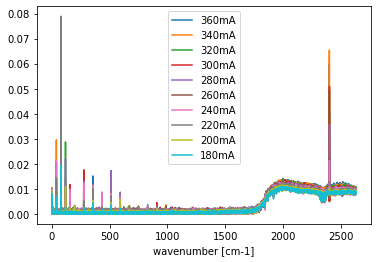

In [15]:
# plot wavenumber domain
for l in range(1,11):
    lll = str(380-20*l)+'mA'
    plt.plot(ddff2["wavenumber"],ddff2[lll],label=lll)
    plt.legend()
    plt.xlabel('wavenumber [cm-1]')